Figure set up, current parameters are: sign =  1 , amplitude =  1 , sigma =  1
done with rho plot in  21.28353977203369  seconds
done with mag plot in  26.550485372543335  seconds
done with beta plot in  25.048376321792603  seconds
done with betabar plot in  26.6622211933136  seconds
done with stress plot in  25.08279848098755  seconds
done with alpha plot in  24.913463830947876  seconds
done
Run time is  149.62465715408325  seconds


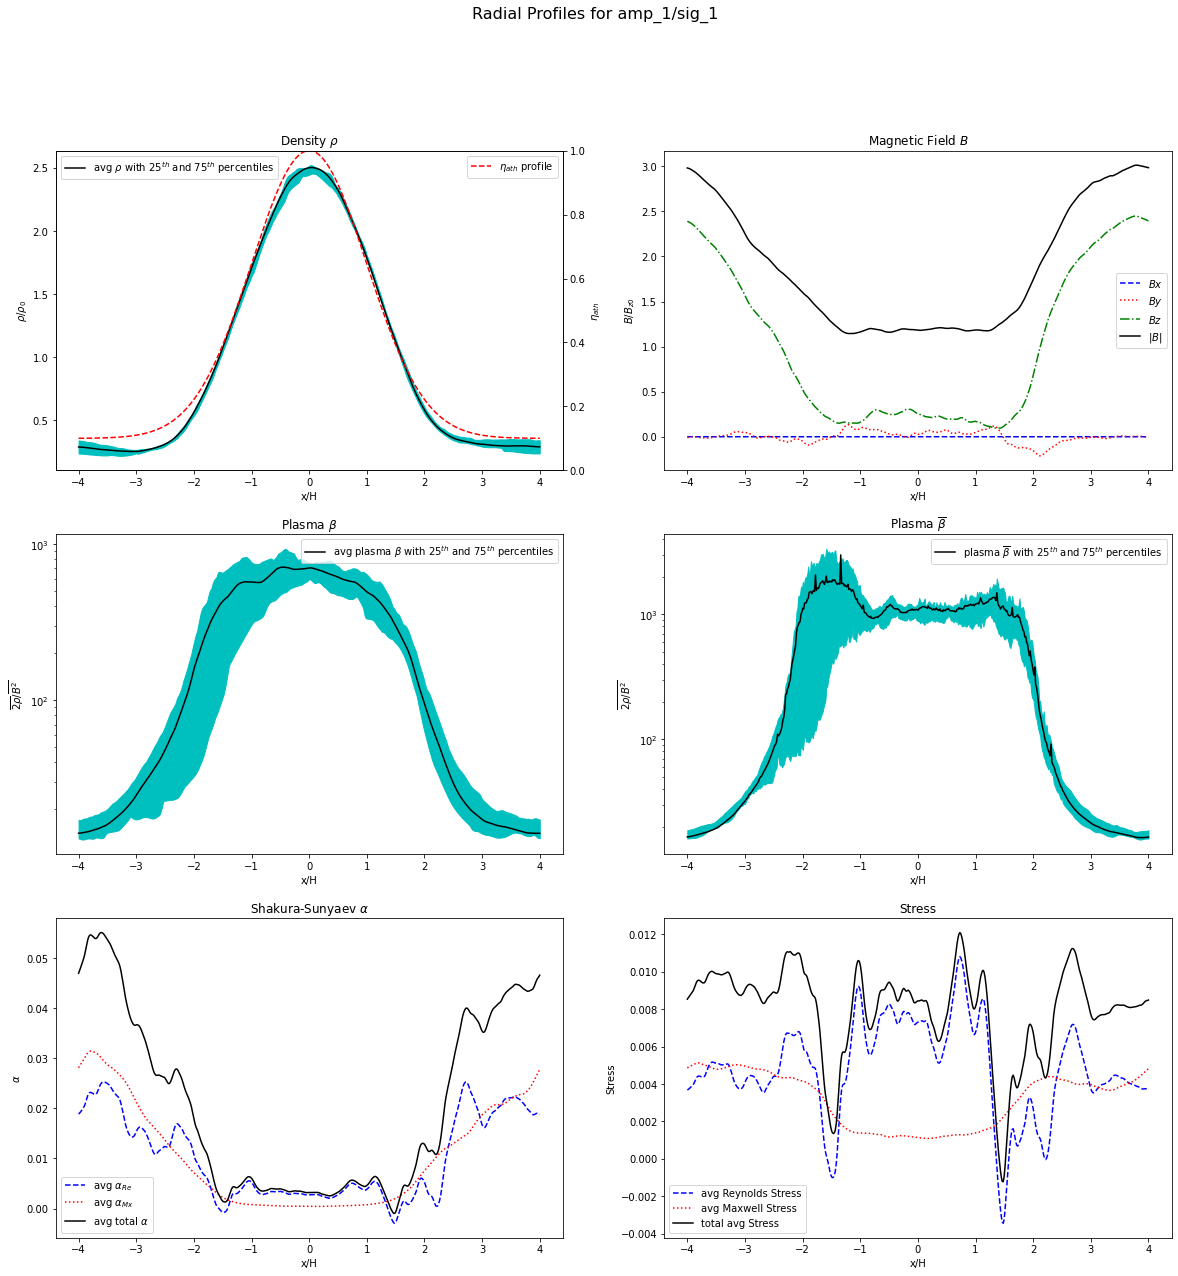

In [2]:
#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)

file_path = './ad_prof/amp_1/sig_1'


def complete_profiles(file_path):
    #figure setup---------------------------------------------------------------
    fig,ax = plt.subplots(3,2)
    #fig2,ax2 = plt.subplots(3,2)
    fig.set_size_inches(20,20)
    x_arr = np.linspace(-4,4,512)
    sptitle = 'Radial Profiles for '+file_path[10:]
    fig.suptitle(sptitle,fontsize=16)

    #read the necessary parameters from the file path
    sgn = 1
    amp = 1
    sig = 1
    if 'sig_point25' in file_path:
        sig = .25
    if 'sig_1' in file_path:
        sig = 1
    if 'sig_5' in file_path:
        sig = 5
    if 'inv'in file_path:
        sgn = -1
    if 'amp_point5'in file_path:
        amp = .5
    if 'amp_1' in file_path:
        amp = 1
    if 'amp_5' in file_path:
        amp = 5
    
    print('Figure set up, current parameters are: sign = ',sgn,', amplitude = ',amp,', sigma = ',sig)
    #rho plot -----------------------------------------------------------------
    rho_time = time.time()
    prof_rho,upper_rho,lower_rho = cmp.avg_rho_prof(file_path)
    ax[0,0].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[0,0].fill_between(x_arr,lower_rho,upper_rho,color ='c')
    ax[0,0].legend(loc='upper left')
    ax[0,0].set_xlabel('x/H')
    ax[0,0].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$'
    ax[0,0].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    
    #overlay the eta profile
   
    ax2 = ax[0,0].twinx()
    ax2.set_ylabel('$\\eta_{ath}$')
    if sgn == -1:
        y_array = amp*(1-.9*np.exp(-(x_arr**2)/(2*(sig**2)))) 
    if sgn == 1:
        y_array = amp*(.9*np.exp(-(x_arr**2)/(2*(sig**2)))+.1) 
    ax2.plot(x_arr,y_array,'r--',label = '$\\eta_{ath}$ profile' )
    ax2.set_ylim(0,amp)
    ax2.legend(loc=1)
    #magnetic plot------------------------------------------------------------------------
    mag_time = time.time()
    #Bz0 as set by initial plasma beta
    Bz0 = np.sqrt(2)/20
    prof_bx,prof_by,prof_bz,prof_bmag = cmp.avg_mag_prof(file_path)
    ax[0,1].plot(x_arr,prof_bx/Bz0,'b--',label ='$Bx$')
    ax[0,1].plot(x_arr,prof_by/Bz0,'r:',label ='$By$')
    ax[0,1].plot(x_arr,prof_bz/Bz0,'g-.',label ='$Bz$')
    ax[0,1].plot(x_arr,prof_bmag/Bz0,'k',label ='$|B|$')
    ax[0,1].legend()
    ax[0,1].set_xlabel('x/H')
    ax[0,1].set_ylabel('$B/B_{z0}$')
    subtitle = 'Magnetic Field $B$'
    ax[0,1].set_title(subtitle)
    print('done with mag plot in ',(time.time()-mag_time),' seconds')
    
    
    
    #Beta plot-------------------------------------------------------------------
    beta_time = time.time()
    prof_beta,upper_beta,lower_beta = cmp.avg_beta_prof(file_path)
    #initial plasma beta
    beta0 = 400
    ax[1,0].semilogy(x_arr,prof_beta,'k',label='avg plasma $\\beta$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[1,0].fill_between(x_arr,(lower_beta),(upper_beta),color ='c')
    ax[1,0].legend()
    ax[1,0].set_xlabel('x/H')
    ax[1,0].set_ylabel('$\\overline{2\\rho}/\\overline{B^2}$')
    subtitle = 'Plasma $\\beta$'
    ax[1,0].set_title(subtitle)
    print('done with beta plot in ',(time.time()-beta_time),' seconds')
    
    #betabar plot--------------------------------------------------------------------
    
    betabar_time = time.time()
    prof_betabar,upper_betabar,lower_betabar = cmp.avg_betabar_prof(file_path)
    #initial plasma beta
    beta0 = 400
    ax[1,1].semilogy(x_arr,prof_betabar,'k',label='plasma $\\overline{\\beta}$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[1,1].fill_between(x_arr,(lower_betabar),(upper_betabar),color ='c')
    ax[1,1].legend()
    ax[1,1].set_xlabel('x/H')
    ax[1,1].set_ylabel('$\\overline{2\\rho/B^2}$')
    subtitle = 'Plasma $\\overline{\\beta}$'
    ax[1,1].set_title(subtitle)
    print('done with betabar plot in ',(time.time()-betabar_time),' seconds')
    
    #stress plot-----------------------------------------------------------------
    stress_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_stress_prof(file_path)
    ax[2,1].plot(x_arr,prof_avg_reyn,'b--',label='avg Reynolds Stress')
    ax[2,1].plot(x_arr,prof_avg_maxw,'r:',label='avg Maxwell Stress')
    ax[2,1].plot(x_arr,(prof_avg_tot),'k',label='total avg Stress')
    ax[2,1].legend()
    ax[2,1].set_xlabel('x/H')
    ax[2,1].set_ylabel('Stress')
    subtitle = 'Stress'
    ax[2,1].set_title(subtitle)   
    print('done with stress plot in ',(time.time()-stress_time),' seconds')


    #Alpha plot-----------------------------------------------------------------
    alpha_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_alpha_prof(file_path)
    ax[2,0].plot(x_arr,prof_avg_reyn,'b--',label='avg $\\alpha_{Re}$')
    ax[2,0].plot(x_arr,prof_avg_maxw,'r:',label='avg $\\alpha_{Mx}$')
    ax[2,0].plot(x_arr,(prof_avg_tot),'k',label='avg total $\\alpha$')
    ax[2,0].legend()
    ax[2,0].set_xlabel('x/H')
    ax[2,0].set_ylabel('$\\alpha$')
    subtitle = 'Shakura-Sunyaev $\\alpha$'
    ax[2,0].set_title(subtitle)
    print('done with alpha plot in ',(time.time()-alpha_time),' seconds')
    
    ans = 'done'
    #kill off fig2 so it doesn't show
    fig2=0
    return ans
    
print(complete_profiles(file_path))    
print('Run time is ',(time.time()-start),' seconds' )

Figure set up, current parameters are: sign =  1 , amplitude =  1 , sigma =  0.25
done with rho plot in  64.42853569984436  seconds
done with mag plot in  26.835187435150146  seconds
done with beta plot in  25.719911098480225  seconds
done with betabar plot in  27.00092387199402  seconds
done with stress plot in  25.6211416721344  seconds
done with alpha plot in  25.607837438583374  seconds
done


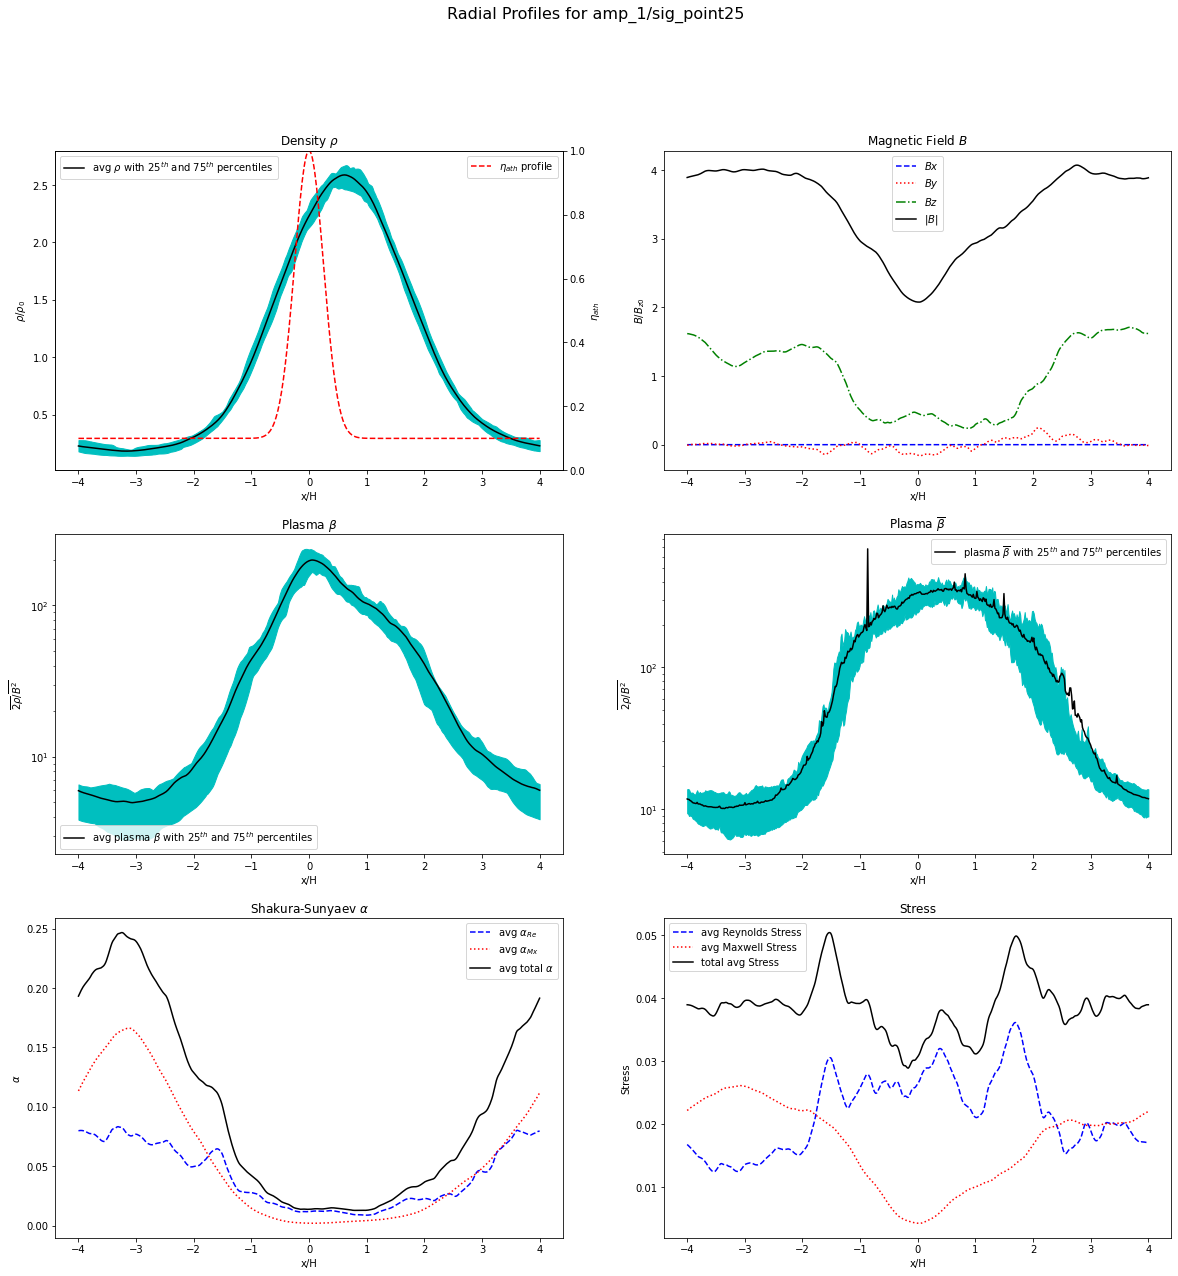

Figure set up, current parameters are: sign =  1 , amplitude =  1 , sigma =  1
done with rho plot in  20.928725481033325  seconds
done with mag plot in  25.966161966323853  seconds
done with beta plot in  25.643470525741577  seconds
done with betabar plot in  25.968663692474365  seconds
done with stress plot in  24.842745304107666  seconds
done with alpha plot in  25.80341672897339  seconds
done


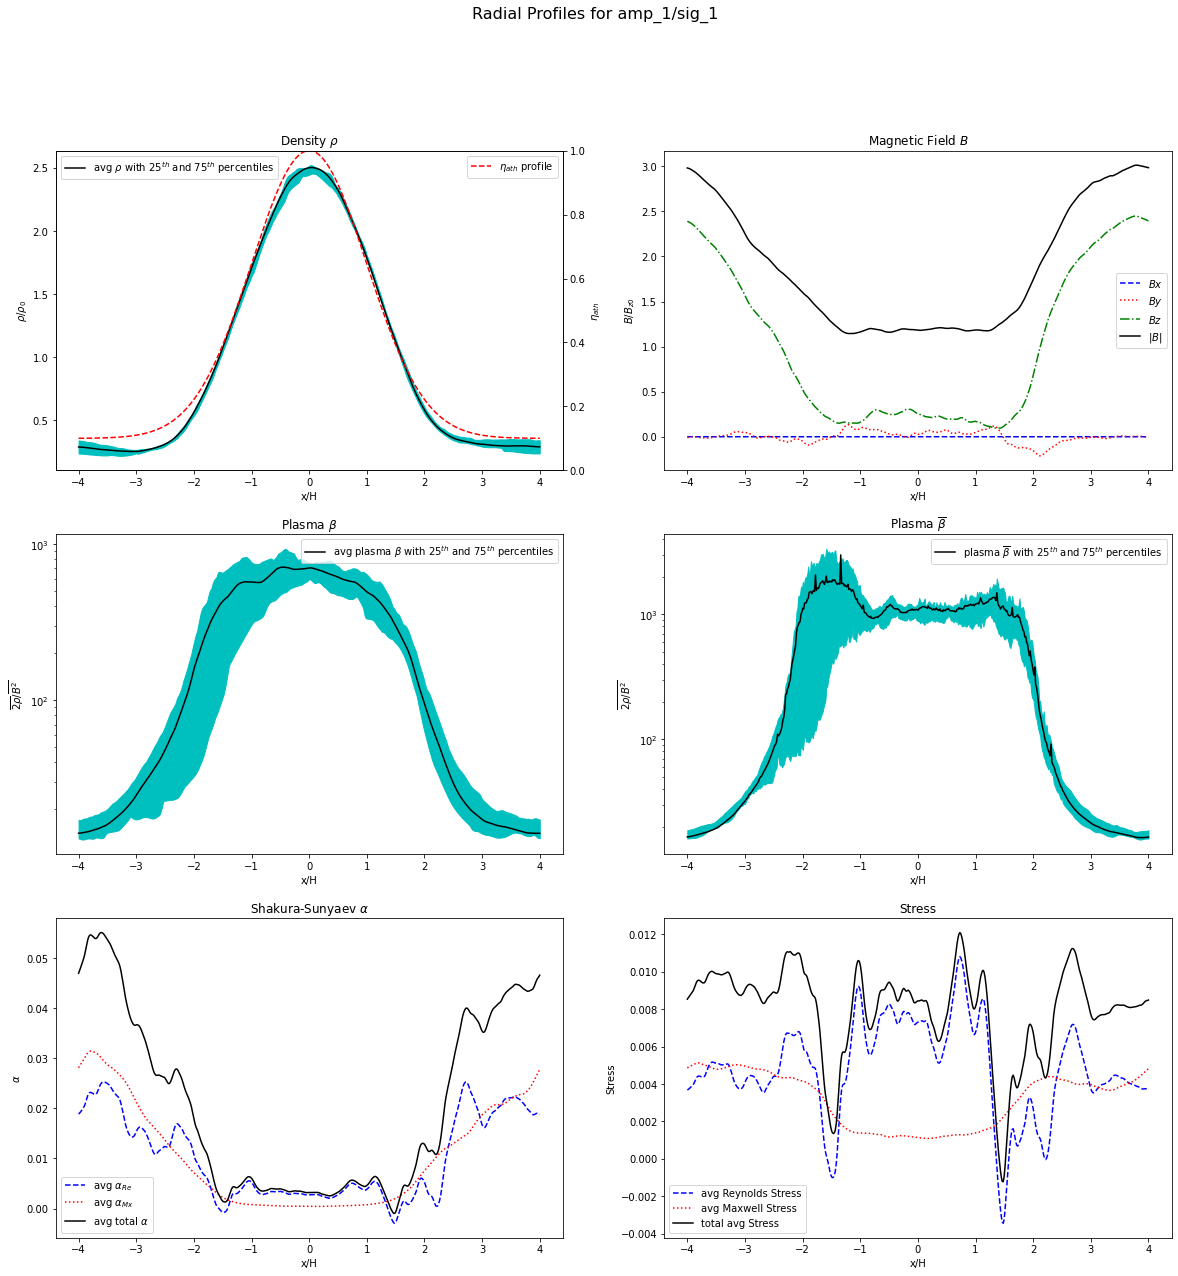

Figure set up, current parameters are: sign =  1 , amplitude =  1 , sigma =  5
done with rho plot in  65.68783020973206  seconds
done with mag plot in  26.811936378479004  seconds
done with beta plot in  25.454404592514038  seconds
done with betabar plot in  26.889760494232178  seconds
done with stress plot in  25.740567684173584  seconds
done with alpha plot in  26.134861707687378  seconds
done


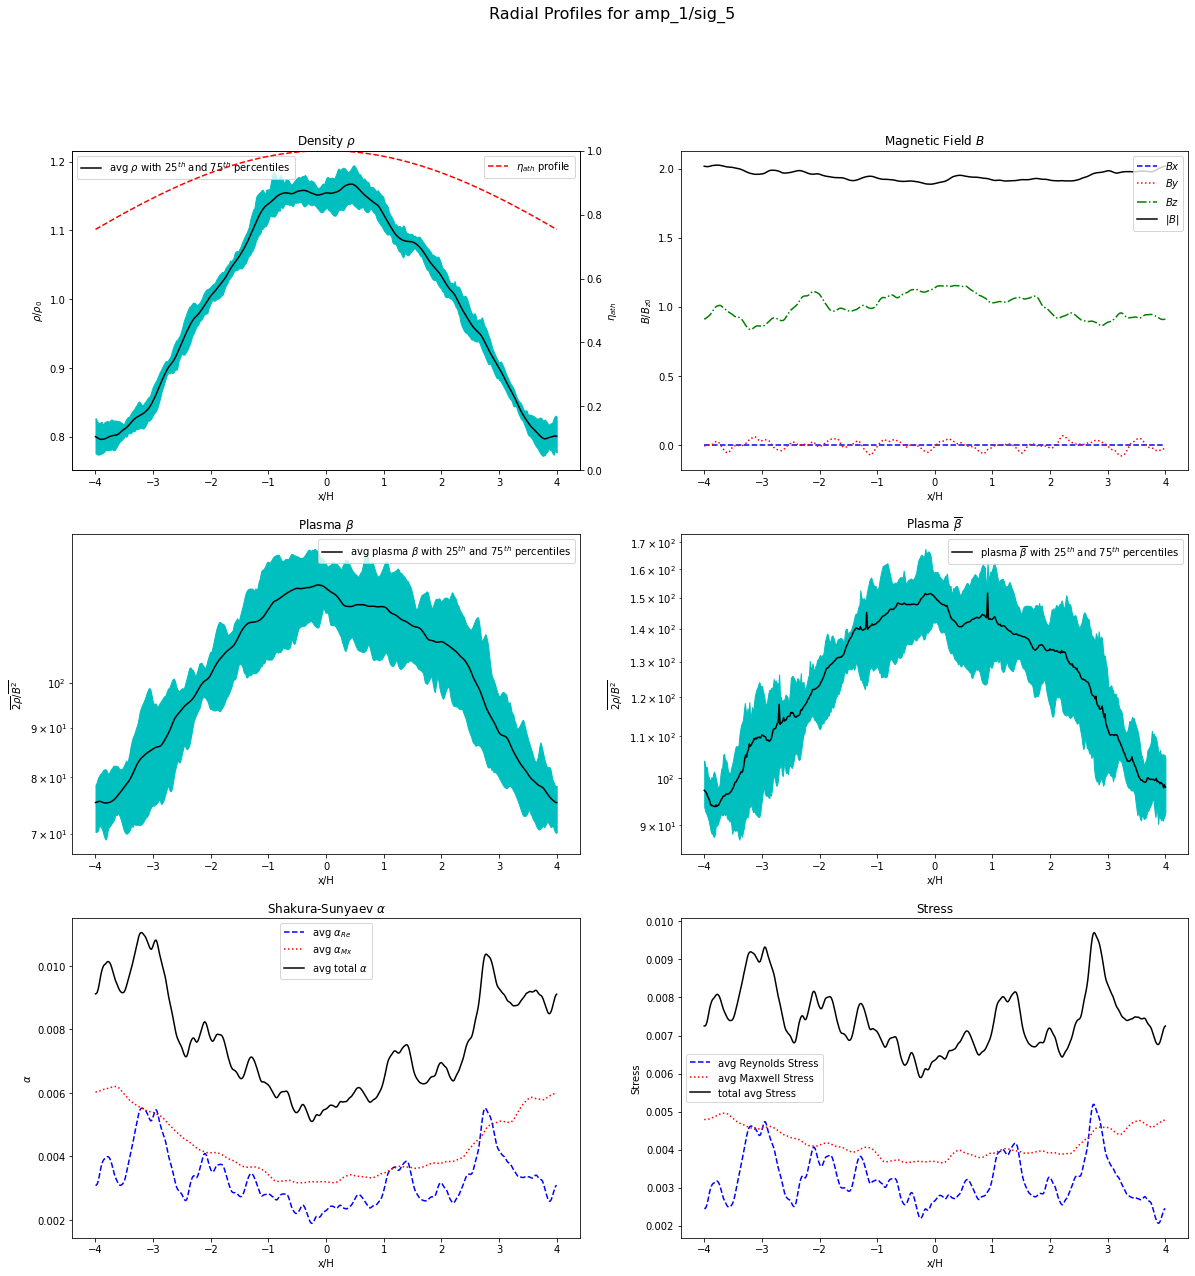

Figure set up, current parameters are: sign =  -1 , amplitude =  1 , sigma =  0.25
done with rho plot in  64.69591283798218  seconds
done with mag plot in  27.882065773010254  seconds
done with beta plot in  25.663427591323853  seconds
done with betabar plot in  26.66029977798462  seconds
done with stress plot in  24.77679967880249  seconds
done with alpha plot in  24.980312824249268  seconds
done


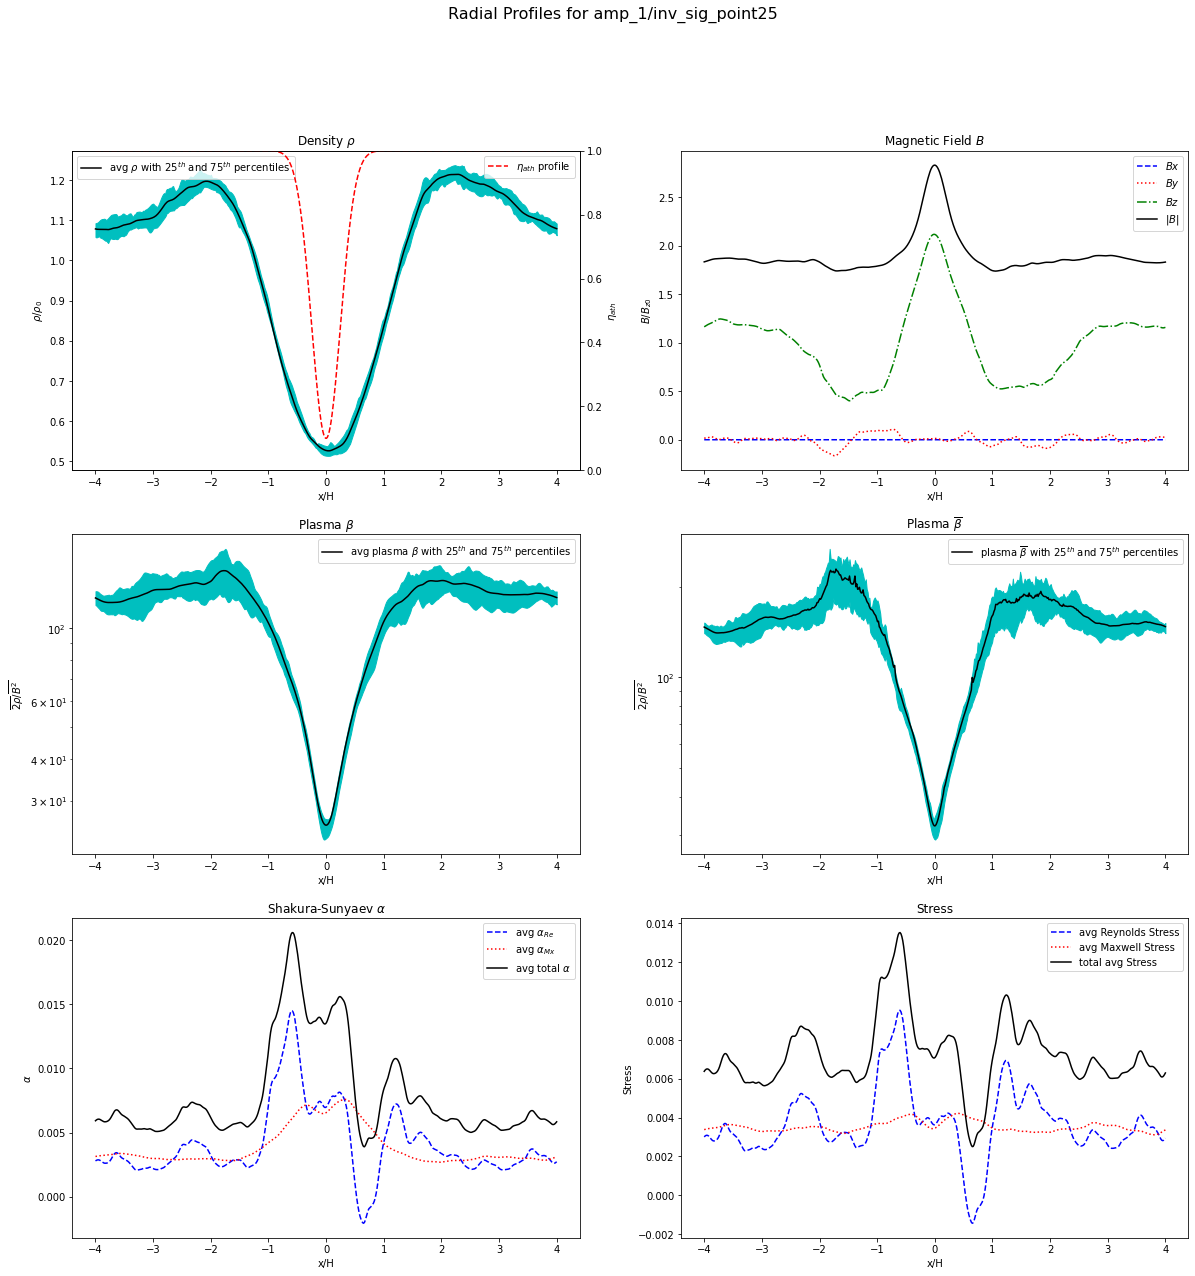

Figure set up, current parameters are: sign =  -1 , amplitude =  1 , sigma =  1
done with rho plot in  64.89952349662781  seconds
done with mag plot in  26.40351629257202  seconds
done with beta plot in  25.340591430664062  seconds
done with betabar plot in  26.592722415924072  seconds
done with stress plot in  25.334249019622803  seconds
done with alpha plot in  25.220754861831665  seconds
done


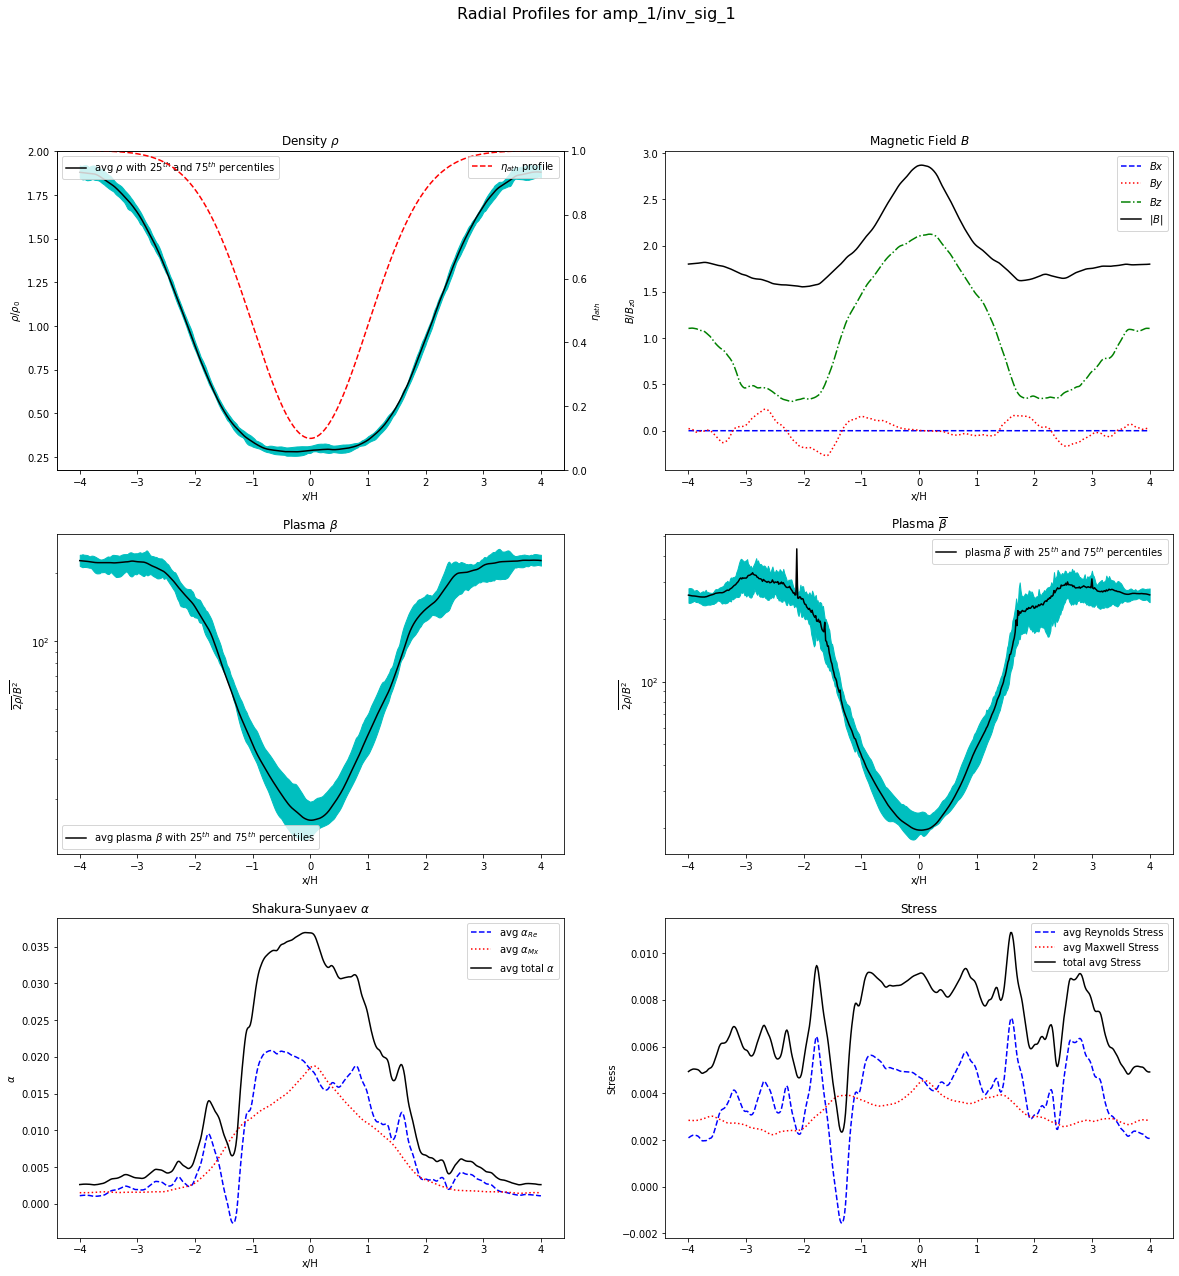

Figure set up, current parameters are: sign =  -1 , amplitude =  1 , sigma =  5
done with rho plot in  64.09913539886475  seconds
done with mag plot in  26.702170372009277  seconds
done with beta plot in  25.389211177825928  seconds
done with betabar plot in  26.07208776473999  seconds
done with stress plot in  24.7300922870636  seconds
done with alpha plot in  24.82915496826172  seconds
done


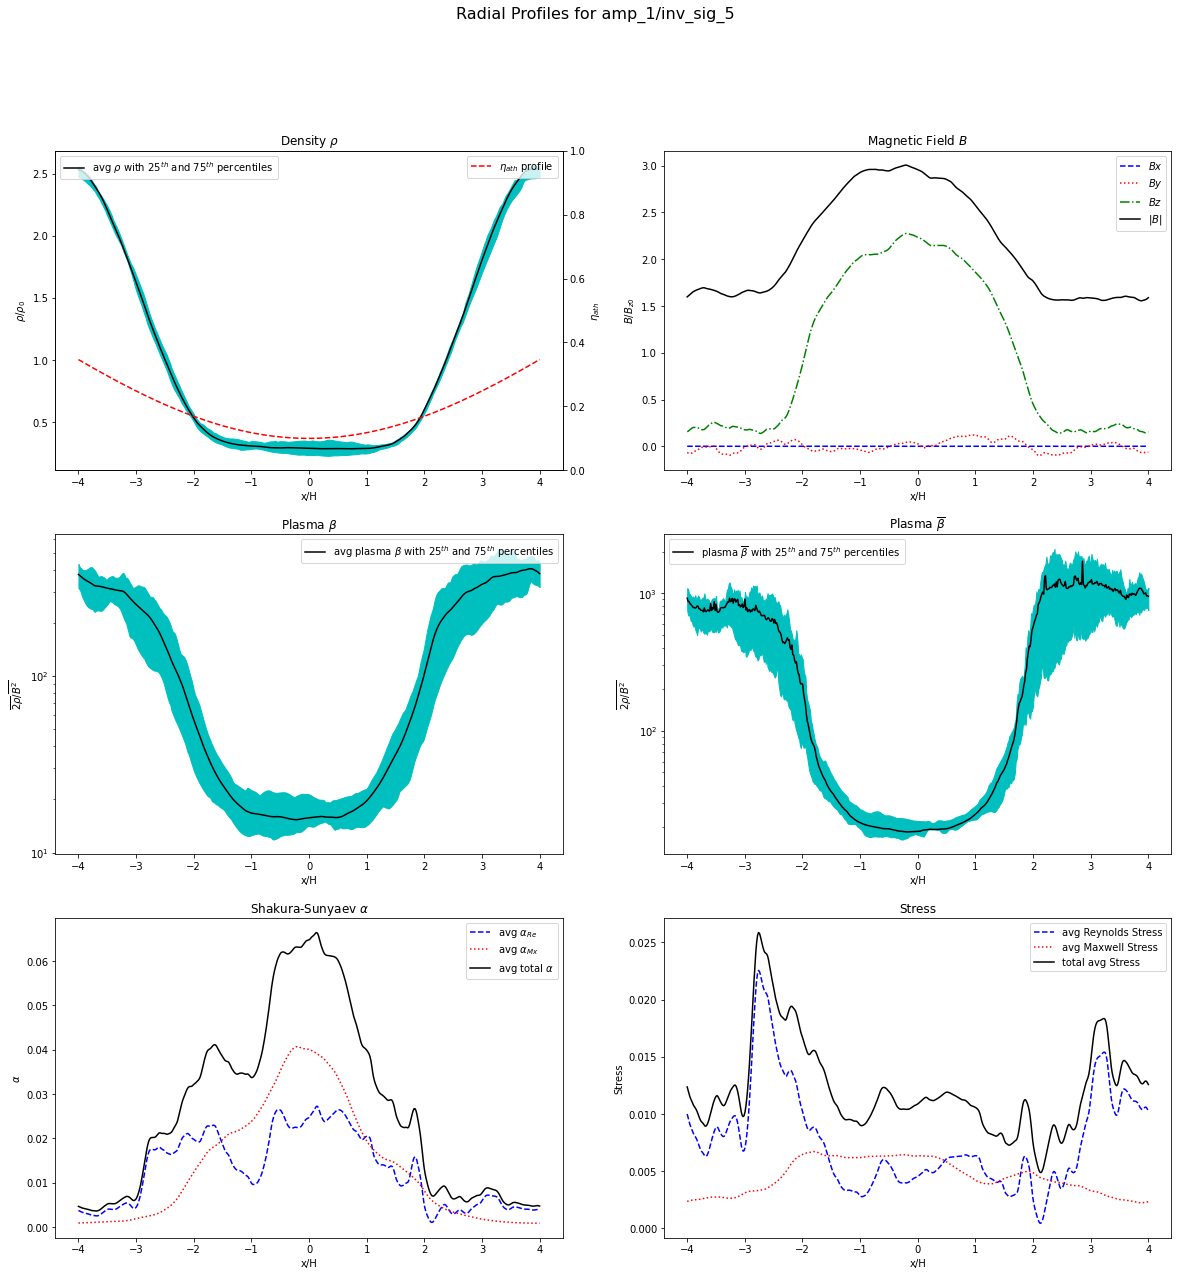

total run time is  1127.2292721271515  seconds


In [3]:
import time
from matplotlib import pylab as plt
import complete_profiles as cmp

from matplotlib import pylab as plt
file_list = [
    "./ad_prof/amp_1/sig_point25",
    "./ad_prof/amp_1/sig_1",
    "./ad_prof/amp_1/sig_5",
    "./ad_prof/amp_1/inv_sig_point25",
    "./ad_prof/amp_1/inv_sig_1",
    "./ad_prof/amp_1/inv_sig_5"]
start = time.time()
for fname in file_list:
    print(complete_profiles(fname))
    plt.show()
print('total run time is ',(time.time()-start),' seconds')

Figure set up, current parameters are: sign =  1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  72.15789794921875  seconds
done with mag plot in  30.637770175933838  seconds
done with beta plot in  30.087937831878662  seconds
done with betabar plot in  28.89763116836548  seconds
done with stress plot in  26.760906457901  seconds
done with alpha plot in  28.032994985580444  seconds
done


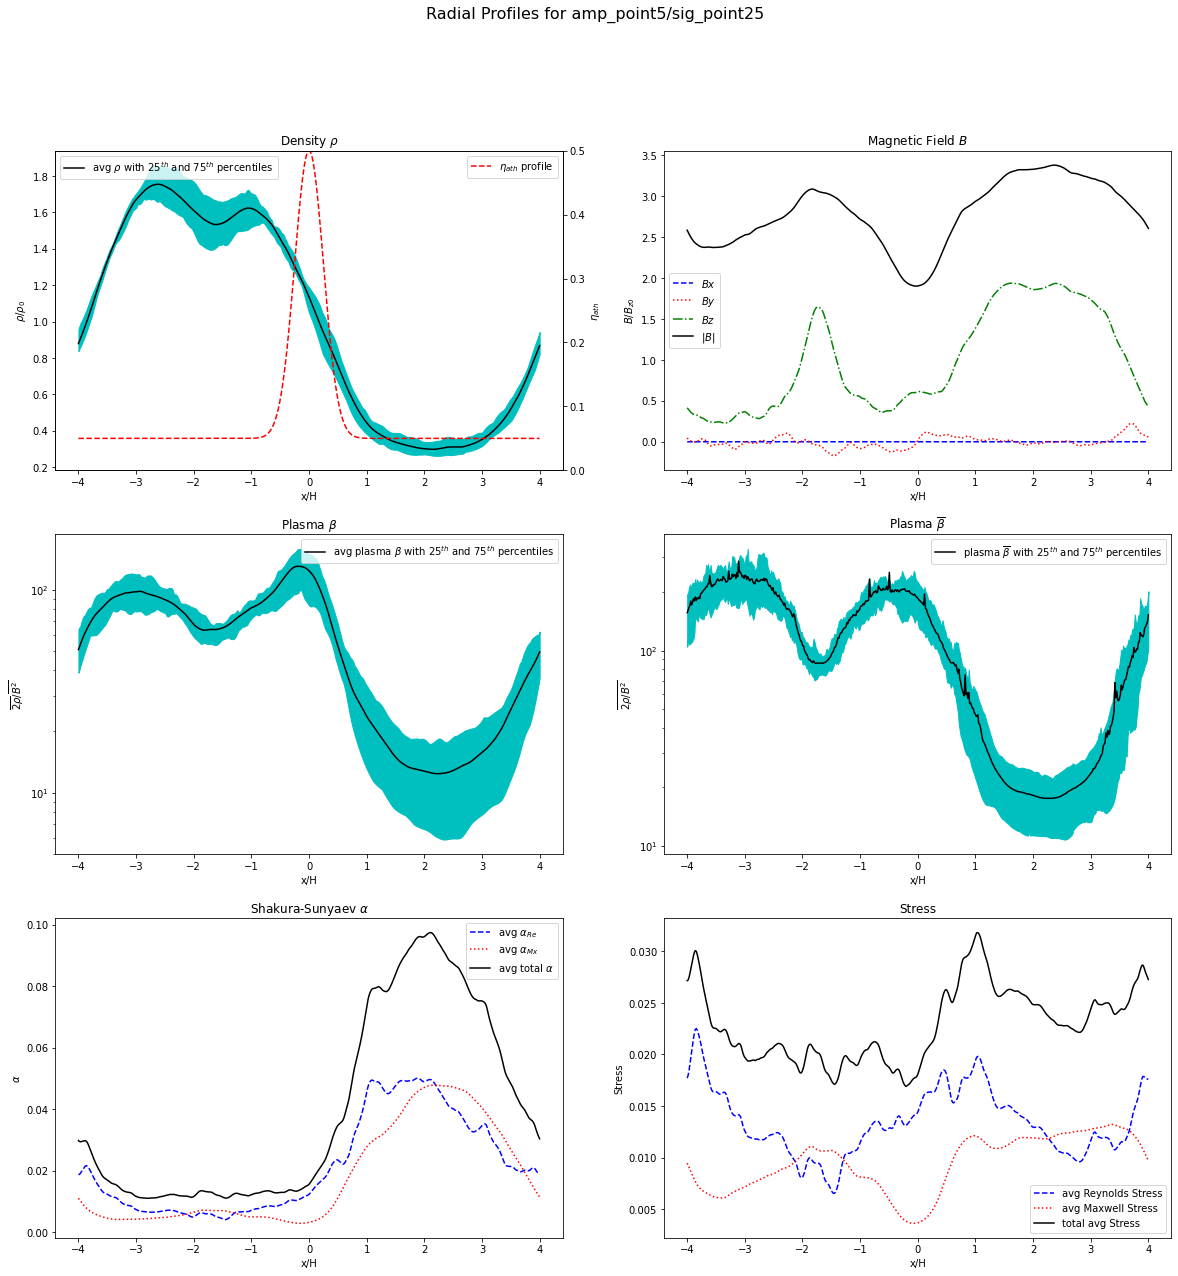

Figure set up, current parameters are: sign =  1 , amplitude =  0.5 , sigma =  1
done with rho plot in  69.93813371658325  seconds
done with mag plot in  30.94005250930786  seconds
done with beta plot in  29.244583129882812  seconds
done with betabar plot in  29.954182386398315  seconds
done with stress plot in  28.664896726608276  seconds
done with alpha plot in  29.682246923446655  seconds
done


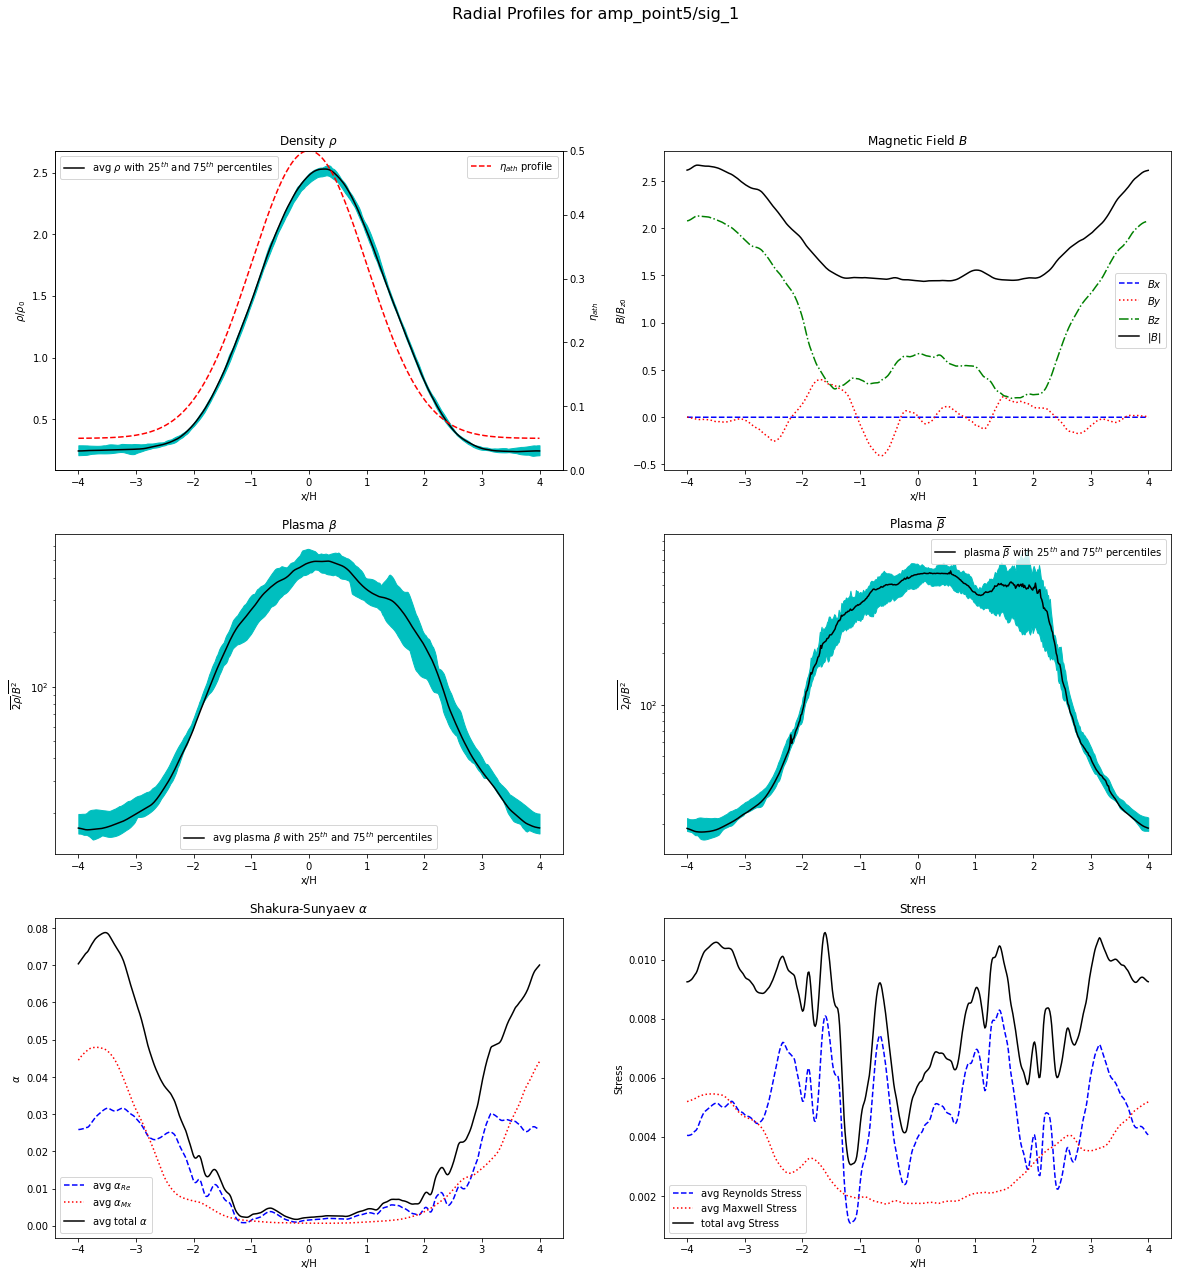

Figure set up, current parameters are: sign =  1 , amplitude =  0.5 , sigma =  5
done with rho plot in  70.48938393592834  seconds
done with mag plot in  30.18096923828125  seconds
done with beta plot in  28.351370334625244  seconds
done with betabar plot in  30.109267234802246  seconds
done with stress plot in  28.911248207092285  seconds
done with alpha plot in  29.91132140159607  seconds
done


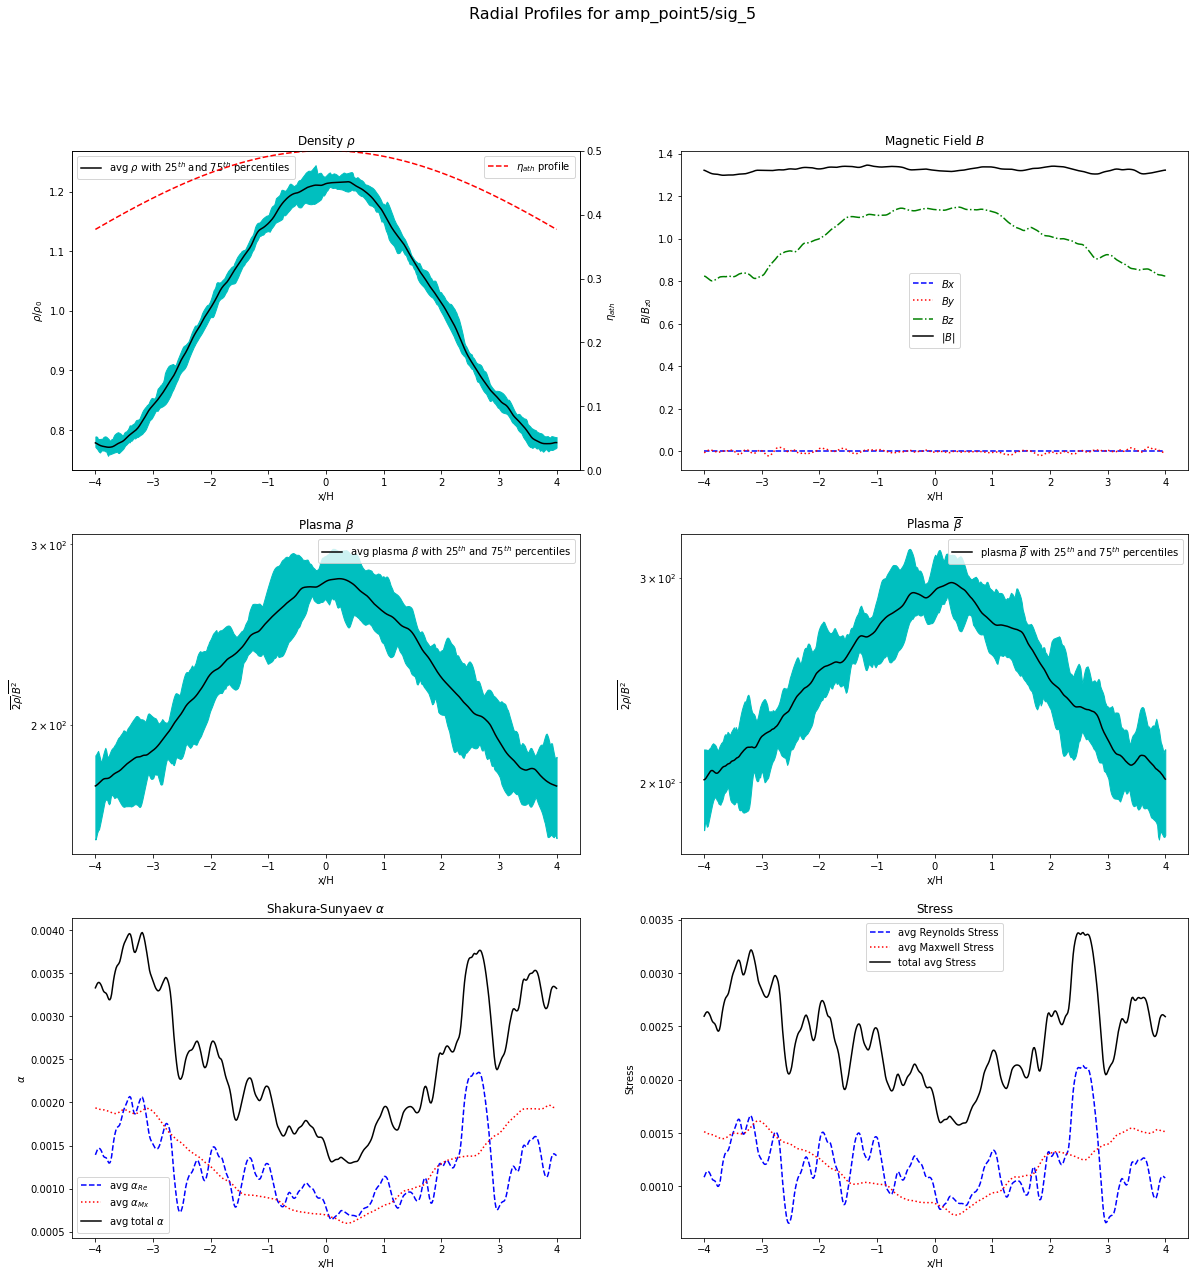

Figure set up, current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  70.24865579605103  seconds
done with mag plot in  30.1638126373291  seconds
done with beta plot in  28.33603000640869  seconds
done with betabar plot in  30.04680824279785  seconds
done with stress plot in  28.349803924560547  seconds
done with alpha plot in  28.81054139137268  seconds
done


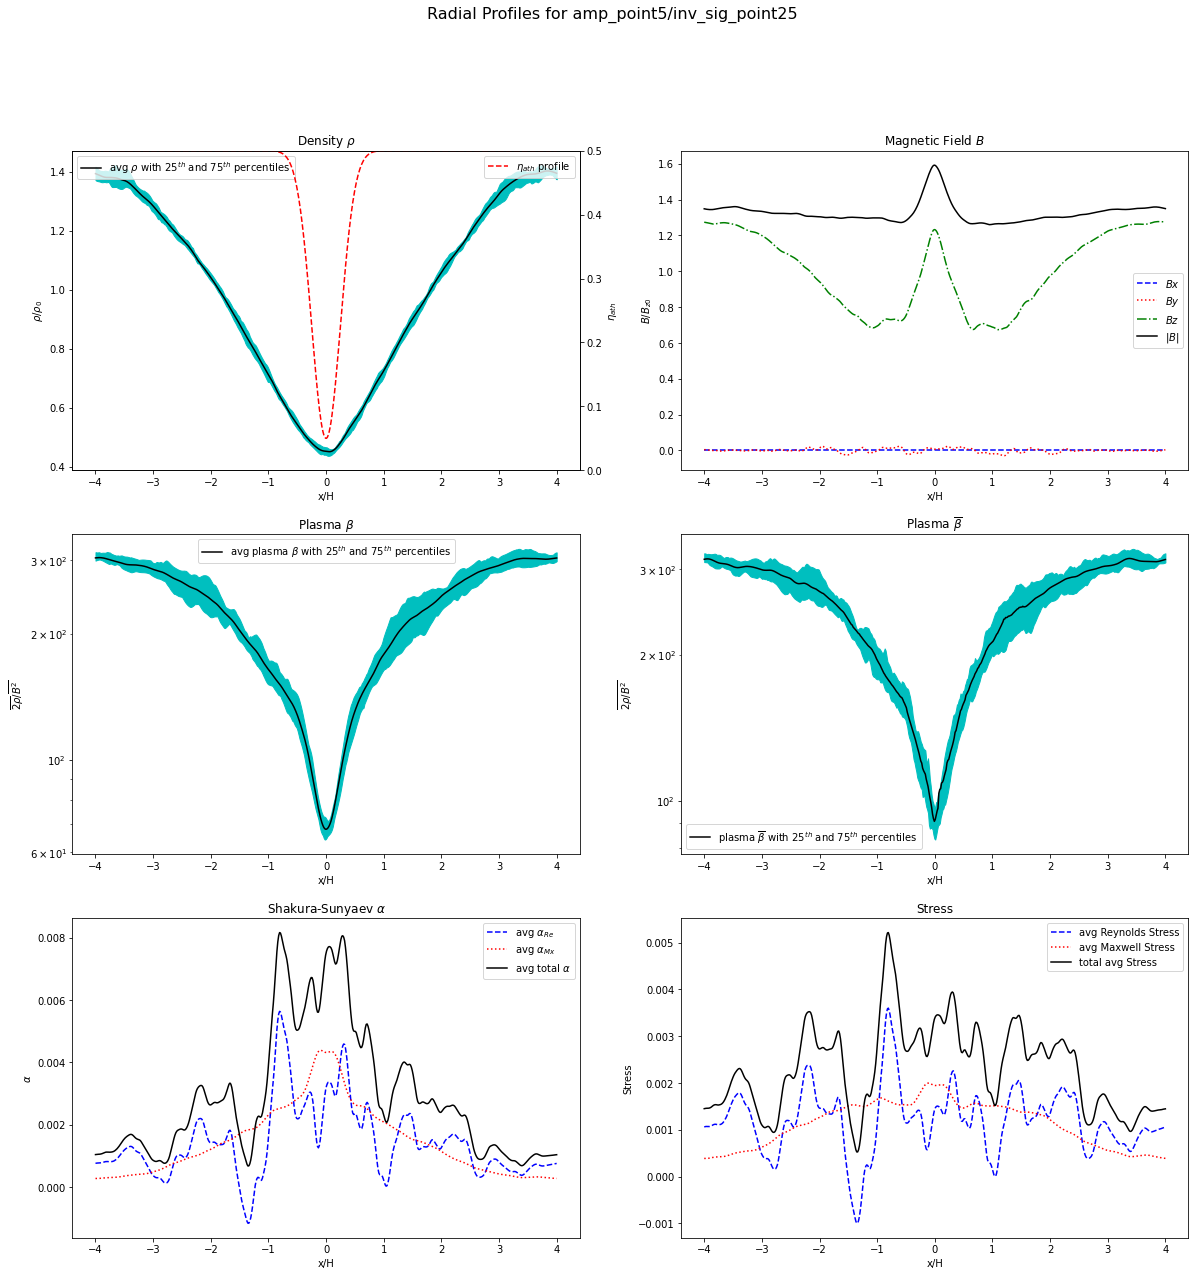

Figure set up, current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  1
done with rho plot in  69.26385688781738  seconds
done with mag plot in  29.937700033187866  seconds
done with beta plot in  27.449968338012695  seconds
done with betabar plot in  28.7615327835083  seconds
done with stress plot in  27.46070408821106  seconds
done with alpha plot in  27.599204063415527  seconds
done


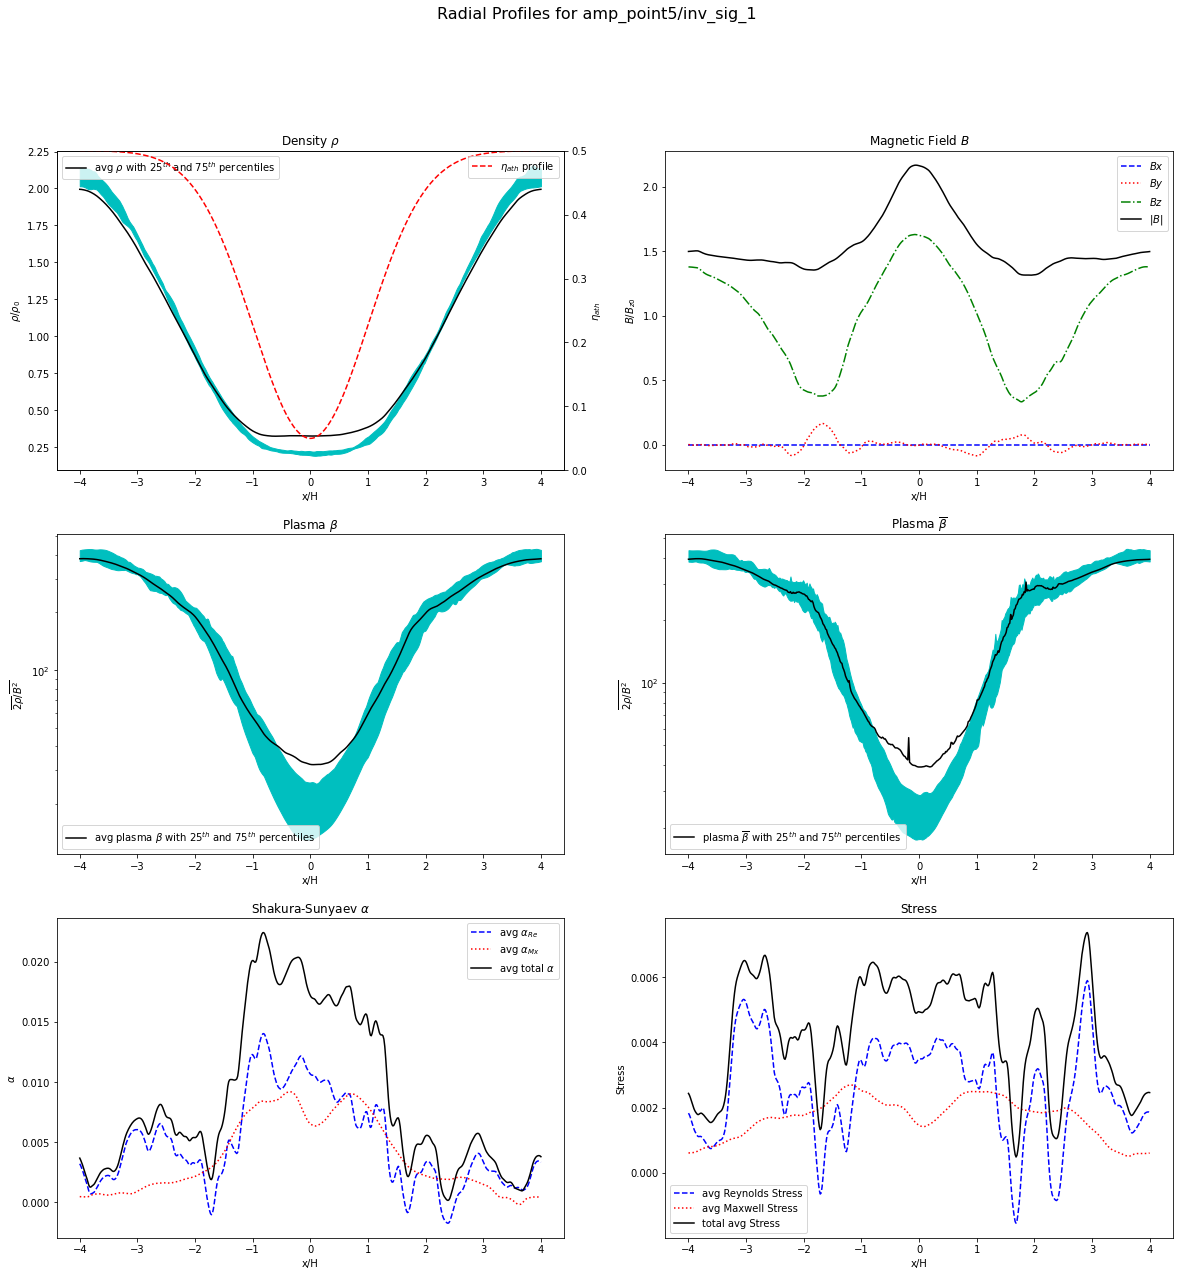

Figure set up, current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  5
done with rho plot in  69.75908303260803  seconds
done with mag plot in  30.614885330200195  seconds
done with beta plot in  28.095824241638184  seconds
done with betabar plot in  32.51195740699768  seconds
done with stress plot in  29.467740774154663  seconds
done with alpha plot in  29.549556970596313  seconds
done


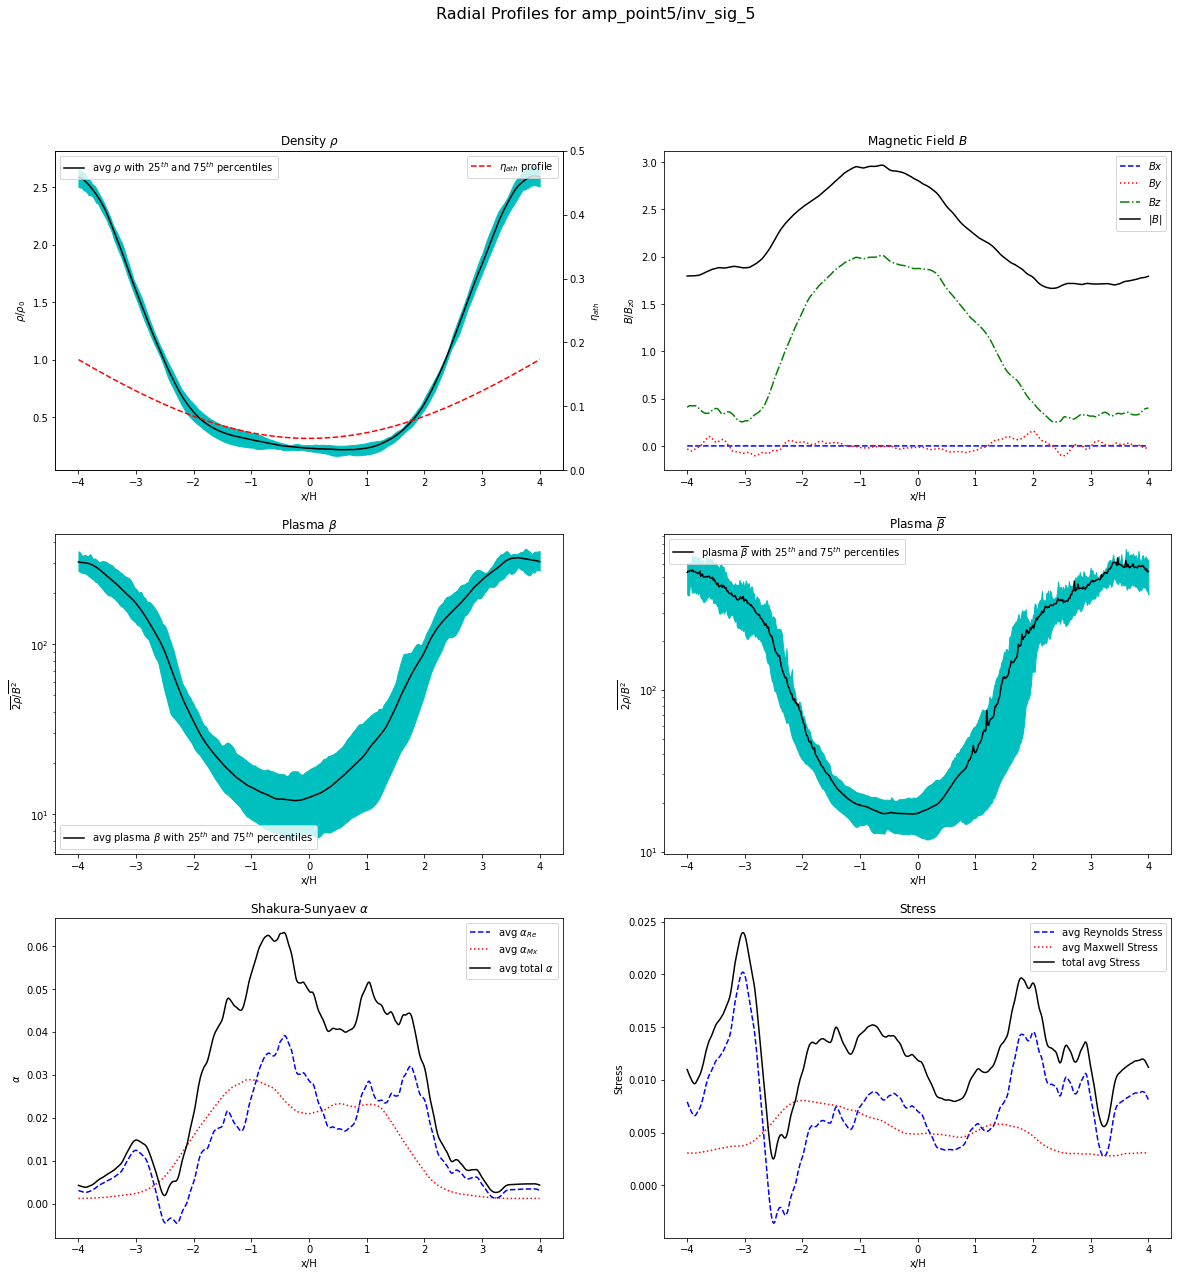

total run time is  1305.924575805664  seconds


In [4]:
from matplotlib import pylab as plt
file_list = [
    "./ad_prof/amp_point5/sig_point25",
    "./ad_prof/amp_point5/sig_1",
    "./ad_prof/amp_point5/sig_5",
    "./ad_prof/amp_point5/inv_sig_point25",
    "./ad_prof/amp_point5/inv_sig_1",
    "./ad_prof/amp_point5/inv_sig_5"]
start = time.time()
for fname in file_list:
    print(complete_profiles(fname))
    plt.show()
print('total run time is ',(time.time()-start),' seconds')